In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [28]:
digits = datasets.load_digits()

In [29]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [30]:
X = digits.data
X.shape

(1797, 64)

In [31]:
y = digits.target
y.shape

(1797,)

In [32]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [34]:
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [35]:
some_digit = X[666]

In [36]:
y[666]

0

In [37]:
some_digit_image = some_digit.reshape(8,8)

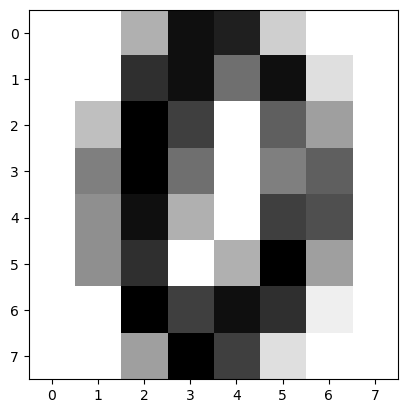

In [38]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [39]:
X[666]


array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [40]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.2)


In [41]:
from playML.knn import KNNClassifier
my_knn_clf = KNNClassifier(k=3)


In [42]:
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [43]:
y_predict = my_knn_clf.predict(X_test)

In [44]:
sum(y_predict == y_test) / len(y_test)

0.9832869080779945

In [45]:
from playML.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9832869080779945

# 超参数

In [46]:
import numpy as np

In [47]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9888888888888889

# 寻找最好的k

In [49]:
best_score = 0.0
best_k = -1
for k in range(1,11):
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train, y_train)
  score = knn_clf.score(X_test, y_test)
  if score > best_score:
    best_k = k
    best_score = score
print("best_k = ", best_k)
print("best_score = ", best_score)

best_k =  1
best_score =  0.9916666666666667


In [50]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform", "distance"]:
  for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
      best_k = k
      best_score = score
      best_method = method
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_method = ", best_method)

best_k =  1
best_score =  0.9916666666666667
best_method =  uniform


In [51]:
%%time

best_score = 0.0
best_k = -1
best_p = -1
for k in range(1,11):
  for p in range(1, 6):
    knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p = p)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
      best_k = k
      best_score = score
      best_p = p
print("best_k = ", best_k)
print("best_score = ", best_score)
print("best_p = ", best_p)

best_k =  1
best_score =  0.9916666666666667
best_p =  2
CPU times: total: 31.5 s
Wall time: 4.25 s


# Grid search

In [52]:
%%time
param_grid = [
  {
    'weights':['uniform'],
    'n_neighbors': [i for i in range(1, 11)]
  },
  {
    'weights':['distance'],
    'n_neighbors': [i for i in range(1, 11)],
    'p':[i for i in range(1, 6)]
  },
  
]
knn_clf = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)
grid_search.fit(X_train, y_train)

CPU times: total: 2min 15s
Wall time: 18.3 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [53]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [54]:
grid_search.best_score_

0.9853852109949672

In [55]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

In [ ]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)